# **1. Introduction**

***Cristiano Ronaldo dos Santos Aveiro*** is a Portuguese professional footballer who plays as a forward for Premier League club Manchester United and captains the Portugal national team.

- Current team: Portugal national football team (#7 / Forward) Trending

- Born: February 5, 1985 (age 37 years), Hospital Dr. Nélio Mendonça, Funchal, Portugal

- Height: 1.87 m
- Partner: Georgina Rodríguez (2017–)
- Salary: 26.52 million GBP (2022)
- Children: Cristiano Ronaldo Jr., Alana Martina dos Santos Aveiro, Eva Maria Dos Santos, Mateo Ronaldo



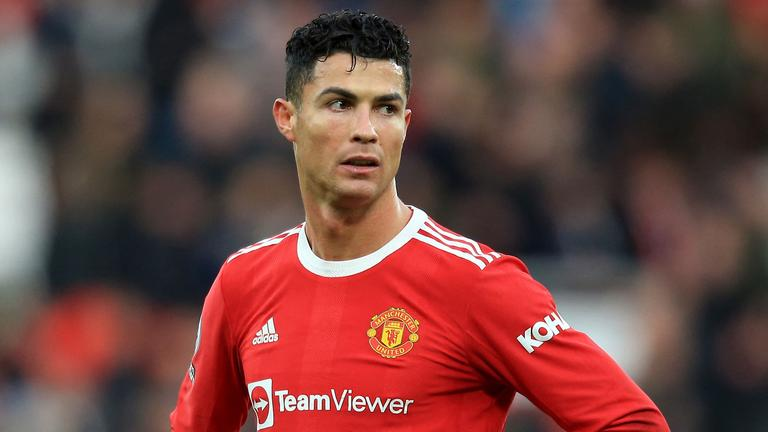

# **2. Import Libraries**



In [1]:
import numpy as np   # Linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import  download_plotlyjs,init_notebook_mode,plot, iplot

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# 3. Import Dataset

In [3]:
df = pd.read_csv("data.csv")  # Loading the data

# 4. Basic Exploration

In [4]:
df.head(5)  # First 5 rows of the dataset

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


# 4.1 Checking Data Shape

In [5]:
df.shape  # Shape of the dataset
rows,columns = df.shape
print("Number of rows: ",rows)        # instances
print("Number of columns: ",columns)  # series

Number of rows:  701
Number of columns:  13


# 4.2. Checking Data Structure

In [6]:
df.info()  # Information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            701 non-null    object
 1   Competition       701 non-null    object
 2   Matchday          701 non-null    object
 3   Date              701 non-null    object
 4   Venue             701 non-null    object
 5   Club              701 non-null    object
 6   Opponent          701 non-null    object
 7   Result            701 non-null    object
 8   Playing_Position  643 non-null    object
 9   Minute            701 non-null    object
 10  At_score          701 non-null    object
 11  Type              686 non-null    object
 12  Goal_assist       459 non-null    object
dtypes: object(13)
memory usage: 71.3+ KB


# 4.3. Checking Missing Values

In [7]:
df.isnull().sum()  # Checking for null values

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position     58
Minute                0
At_score              0
Type                 15
Goal_assist         242
dtype: int64

In [8]:
df = df.dropna()  # Dropping the null values

In [9]:
df.isnull().sum()  # Checking null values

Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                0
Goal_assist         0
dtype: int64

- We do not have any null value in dataset that is gud

# 4.4. Summary/Statistics of Dataset

In [10]:
df.describe(include=["object"]).T     # Descriptive statistics

,count,unique,top,freq
Season,420,20,14/15,44
Competition,420,12,LaLiga,200
Matchday,420,47,Group Stage,49
Date,420,309,09-12-15,4
Venue,420,2,H,240
Club,420,4,Real Madrid,301
Opponent,420,101,Sevilla FC,19
Result,420,49,3:00,31
Playing_Position,420,5,LW,238
Minute,420,101,70,10


In [11]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 4.5. Checking Unique Values Counts

In [12]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns =["Unique Values Counts"]) # Unique values

,Unique Values Counts
Season,20
Competition,12
Matchday,47
Date,309
Venue,2
Club,4
Opponent,101
Result,49
Playing_Position,5
Minute,101


# 5. Data Visualization

# 5.1 Goals Per Competition

In [13]:
px.bar(df,x="Competition",title="Goals Per Competition",
       log_x=False,log_y=False,
       height=600,
       color="Club",
       hover_name="Club",
       hover_data=["Competition","Club"])

In [14]:
df.Competition.value_counts()

LaLiga                   200
UEFA Champions League    102
Serie A                   48
Premier League            37
Copa del Rey              15
FIFA Club World Cup        5
FA Cup                     4
Supercopa                  4
UEFA Super Cup             2
Liga Portugal              1
Supercoppa Italiana        1
Italy Cup                  1
Name: Competition, dtype: int64

# 5.2 Goals Per Season

In [15]:
px.bar(df,x="Season",title="Goals Per Season",
       log_x=False,log_y=False,
       height=600,
       color="Club",
       hover_name="Club",
       hover_data=["Competition","Season","Club"])

# 5.3 Goals Per Clubs

In [16]:
px.histogram(df,x="Club",title="Goals Per Club",
       log_x=False,log_y=False,
       height=600,
       color="Season",
       hover_name="Season",
       hover_data=["Competition","Season","Club"])

In [17]:
px.histogram(df,x="Club",title="Goals Per Club",
       log_x=False,log_y=False,
       height=600,
       color="Competition",
       hover_name="Competition",
       hover_data=["Competition","Season","Club"])

# 5.4 Check Goals Per Playing Position

In [18]:
px.histogram(df,x="Playing_Position",title="Goals Per Playing Position",
             log_x=False,log_y=False,
             height=600,
             color="Club",
             hover_name="Club",
             hover_data=["Playing_Position","Competition","Season","Club"])

# 5.5 Goals Per Game Minute

In [19]:
mins = list(map(str,range(1,121)))
mins.insert(45,"1st Half")
mins.insert(90,"2nd Half")
mins.insert(105,"1st Half Extra Time")
mins.insert(120,"2nd Half Extra Time")
df.loc[df.Minute.str[":3"]=="45+","Minute"]="1st Half"
df.loc[df.Minute.str[":3"]=="90+","Minute"]="2nd Half"
df.loc[df.Minute.str[":4"]=="105+","Minute"]="1st Half Extra Time"
df.loc[df.Minute.str[":4"]=="120+","Minute"]="2nd Half Extra Time"
mins1 = mins[:23]
mins2 = mins[23:46]
mins3 = mins[46:69]
mins4 = mins[69:92]
mins5 = mins[92:]

Text(0.5, 1.0, 'Goals Per Minute (1-23)')

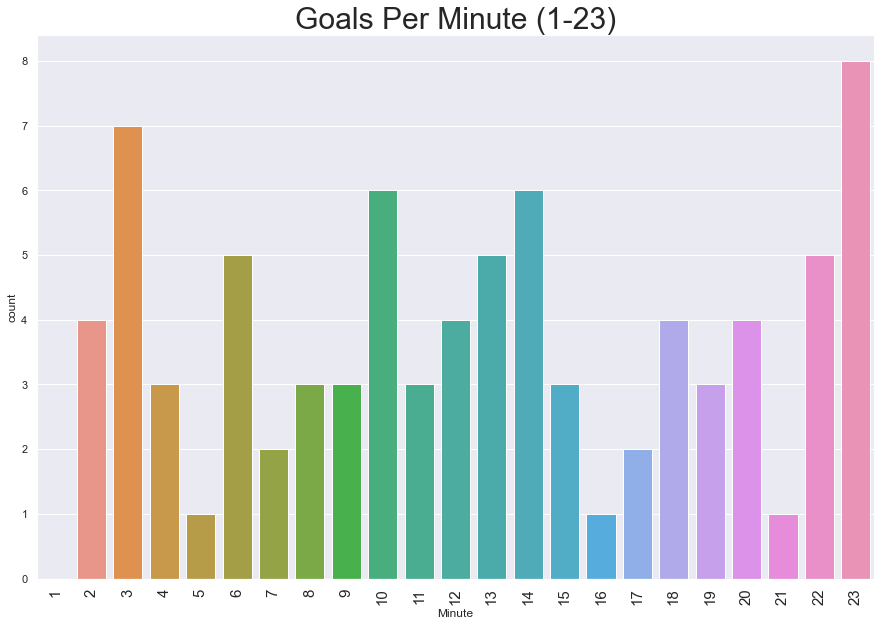

In [20]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Minute"],order=mins1)
p.axes.set_title("Goals Per Minute (1-23)",fontsize=30)

Text(0.5, 1.0, 'Goals Per Game Minute (24- First Half Extra Time)')

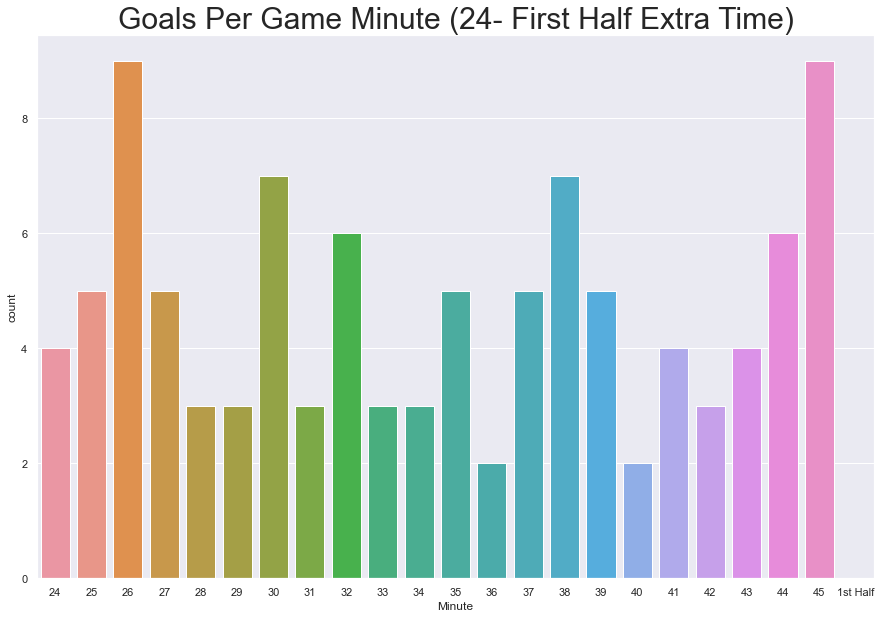

In [21]:
p = sns.countplot(df["Minute"],order=mins2)
p.axes.set_title("Goals Per Game Minute (24- First Half Extra Time)",fontsize=30)

Text(0.5, 1.0, 'Goals Per Game Minute (46-68)')

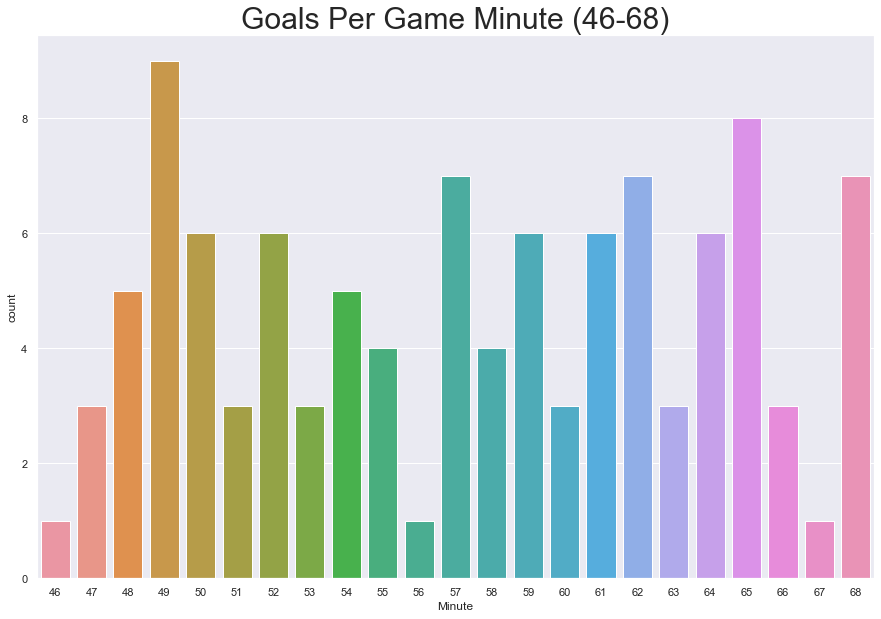

In [22]:
p = sns.countplot(df["Minute"],order=mins3)
p.axes.set_title("Goals Per Game Minute (46-68)",fontsize=30)

Text(0.5, 1.0, 'Goals Per Game Minute (69-91) 2nd Half Extra Time')

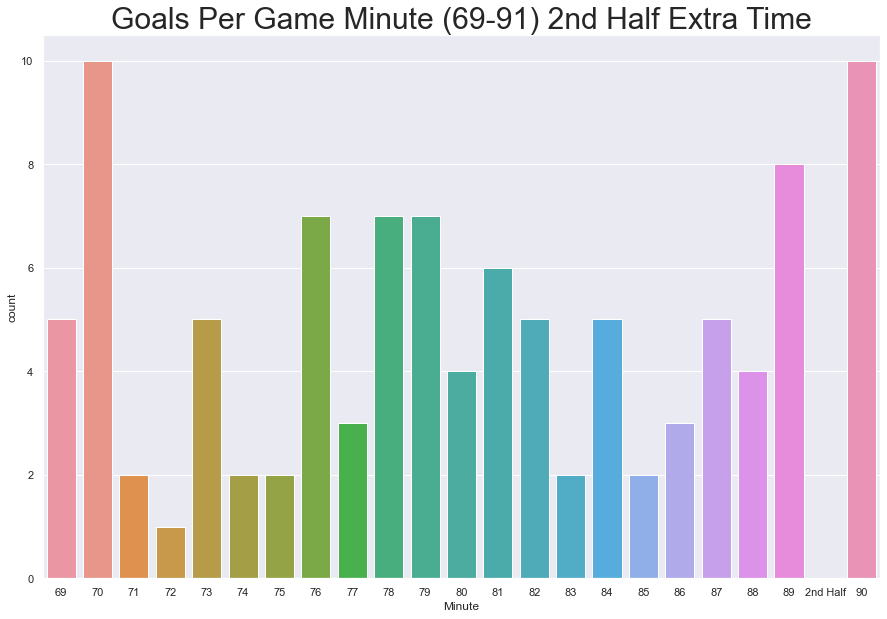

In [23]:
p = sns.countplot(df["Minute"],order=mins4)
p.axes.set_title("Goals Per Game Minute (69-91) 2nd Half Extra Time",fontsize=30)

Text(0.5, 1.0, 'Goals Per Game Minute (92-120) Extra Time')

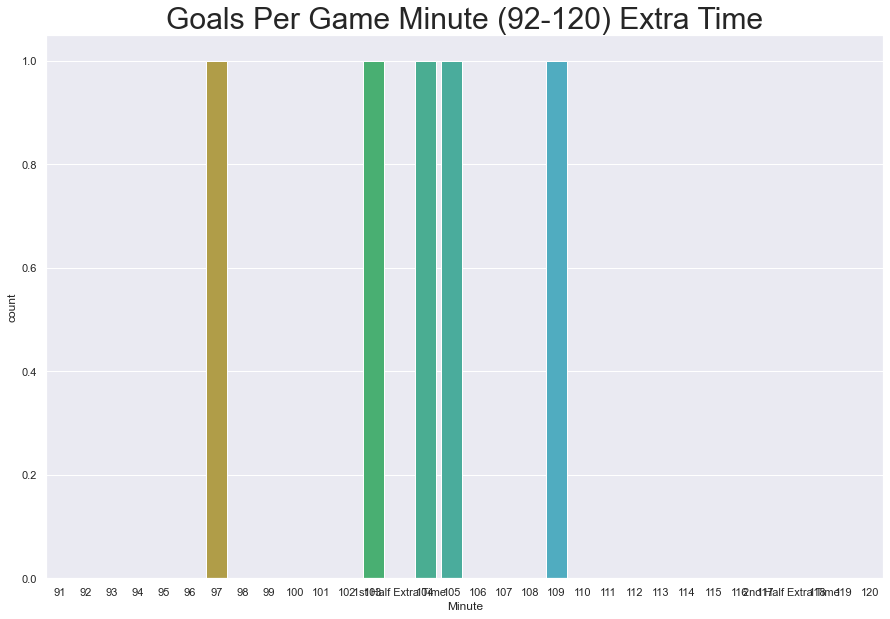

In [24]:
p = sns.countplot(df["Minute"],order=mins5)
p.axes.set_title("Goals Per Game Minute (92-120) Extra Time",fontsize=30)

- He did score in all 90 game minutes.

# 5.6 Goals Per Type of Goals

In [25]:
px.histogram(df,x="Type",title="Goals Per Type",
             log_x=False,log_y=False,
             height=600,
             color="Club",
             hover_name="Club",
             hover_data=["Playing_Position","Competition","Season","Club"])

# Checking Scoreline After Goal

Text(0.5, 1.0, 'Goals Per At Score')

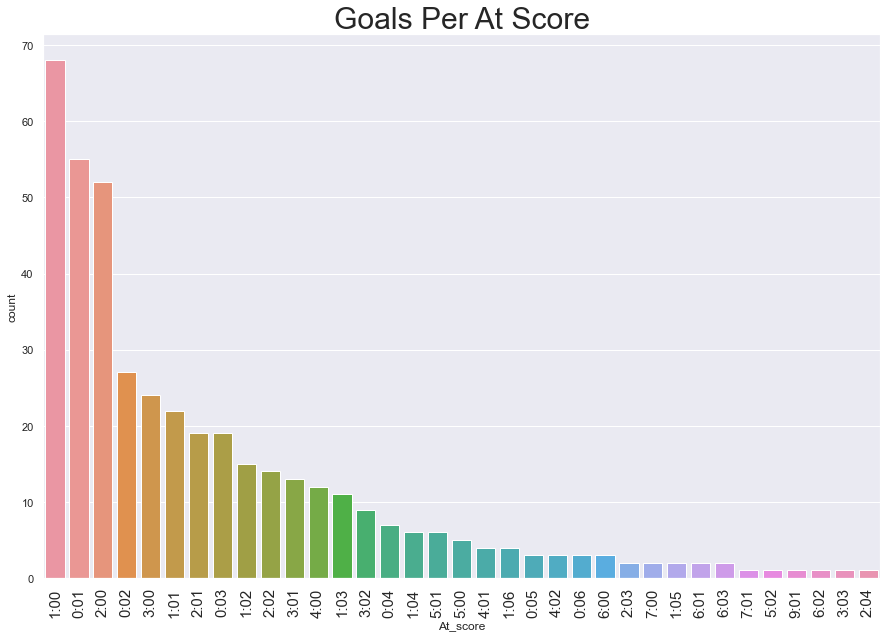

In [26]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["At_score"],hue_order=df.groupby("Competition"),
                order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Per At Score",fontsize=30)

# 5.7 Opponents

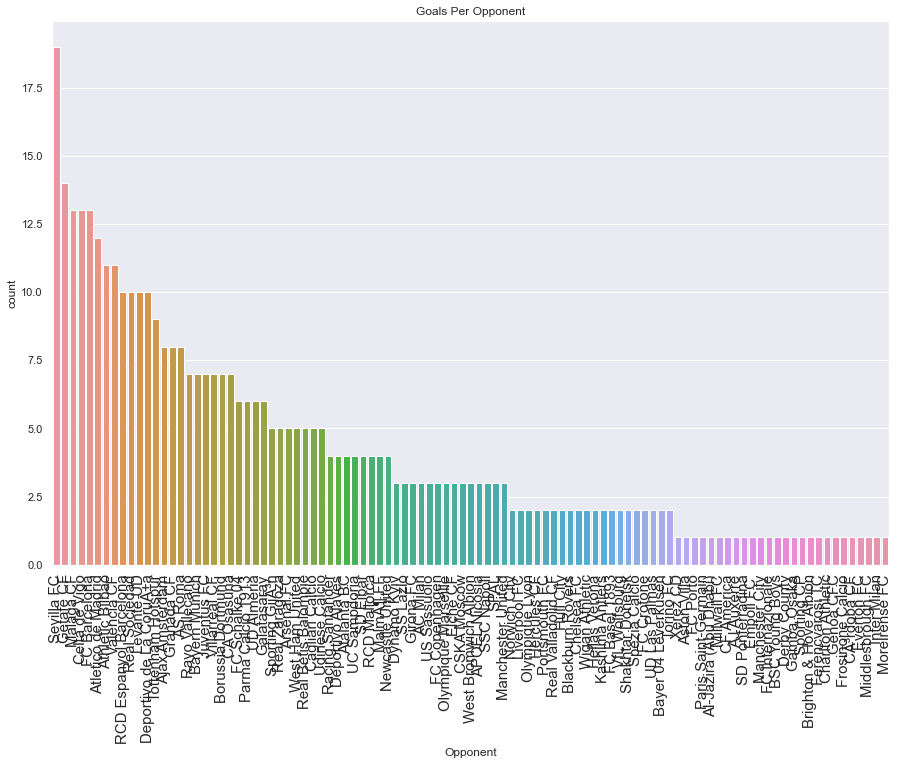

In [27]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=
            df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.title.set_text("Goals Per Opponent")

In [28]:
mins = list(map(str,df.Opponent.value_counts().sort_values(ascending=False).index))
for min in df["Opponent"]:
    if min not in mins:
        mins.append(min)
mins1 = mins[:int(len(mins)/5)]
mins2 = mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3 = mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4 = mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5 = mins[4*int(len(mins)/5):]


Text(0.5, 1.0, 'Goals Per Opponent')

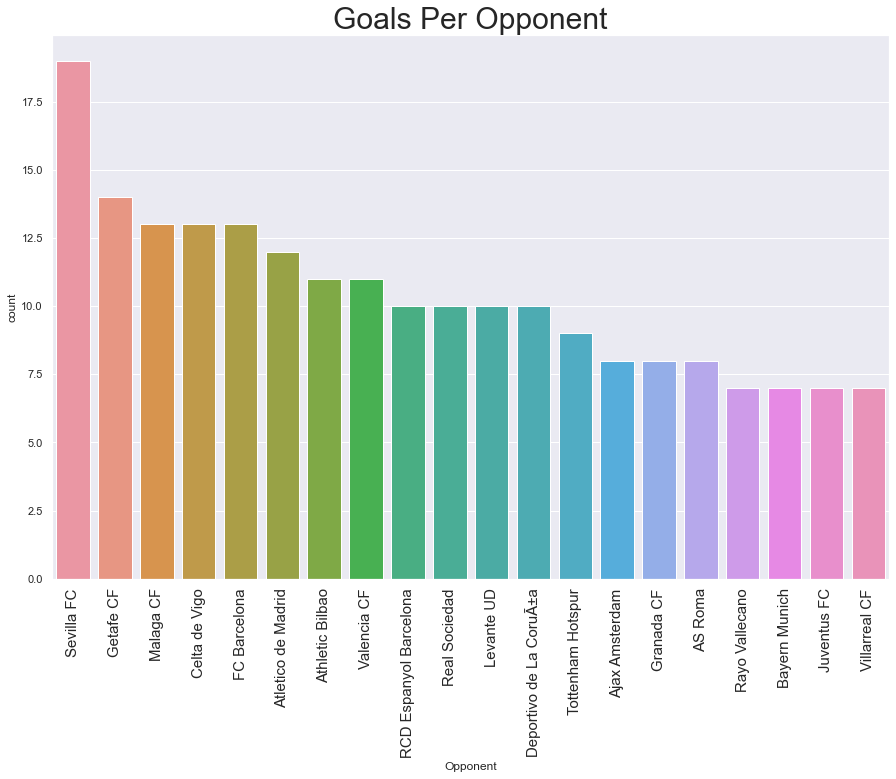

In [29]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=mins1)
p.axes.set_title("Goals Per Opponent",fontsize=30)


Text(0.5, 1.0, 'Goals Per Opponent')

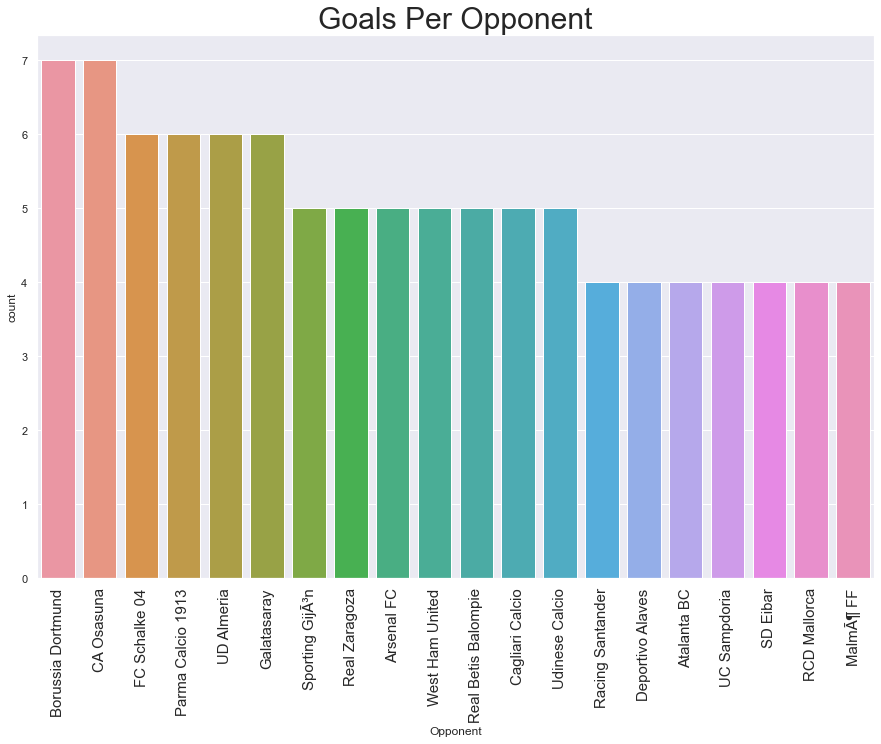

In [30]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=mins2)
p.axes.set_title("Goals Per Opponent",fontsize=30)

Text(0.5, 1.0, 'Goals Per Opponent')

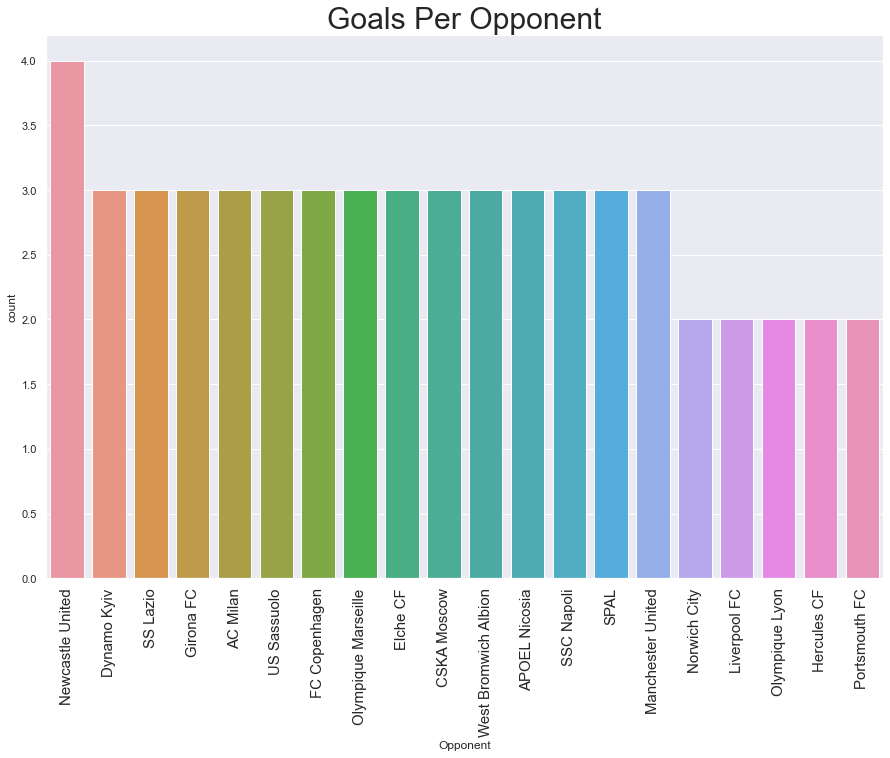

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=mins3)
p.axes.set_title("Goals Per Opponent",fontsize=30)

Text(0.5, 1.0, 'Goals Per Opponent')

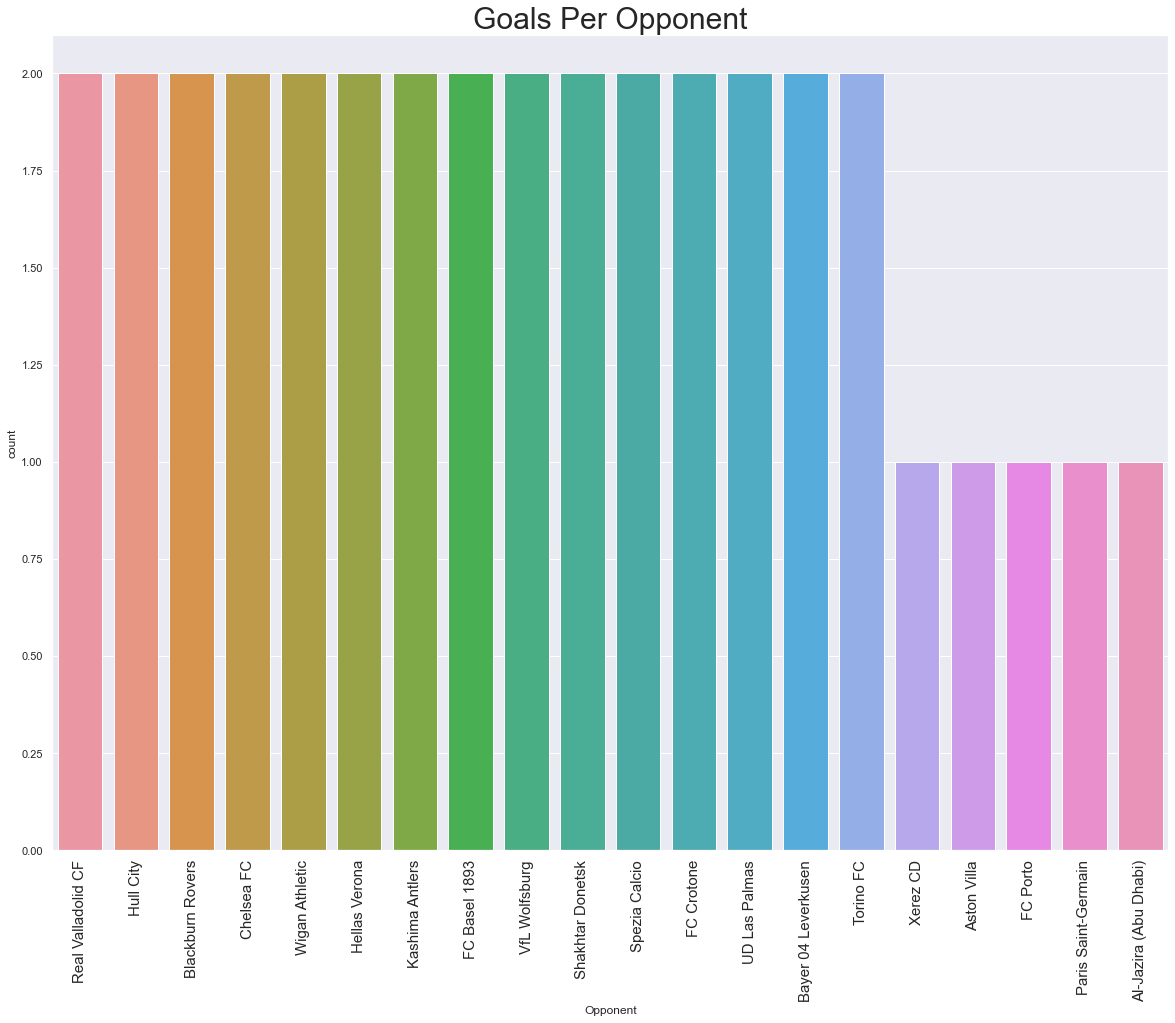

In [32]:
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=mins4)
p.axes.set_title("Goals Per Opponent",fontsize=30)

Text(0.5, 1.0, 'Goals Per Opponent')

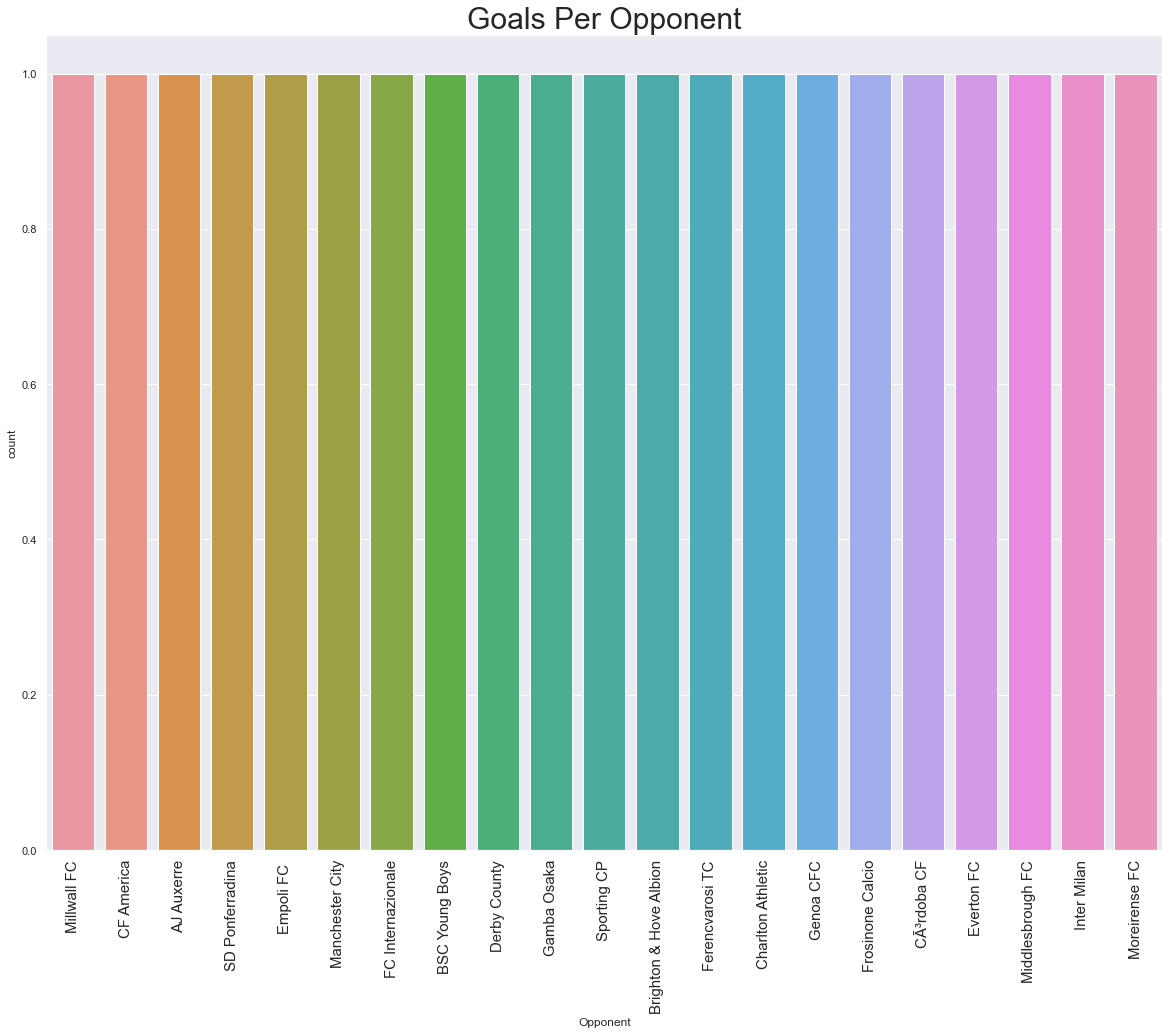

In [33]:
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=90,fontsize=15)
p = sns.countplot(df["Opponent"],hue_order=df.groupby("Competition"),order=mins5)
p.axes.set_title("Goals Per Opponent",fontsize=30)

# 5.8 Favorite Opponents

<BarContainer object of 8 artists>

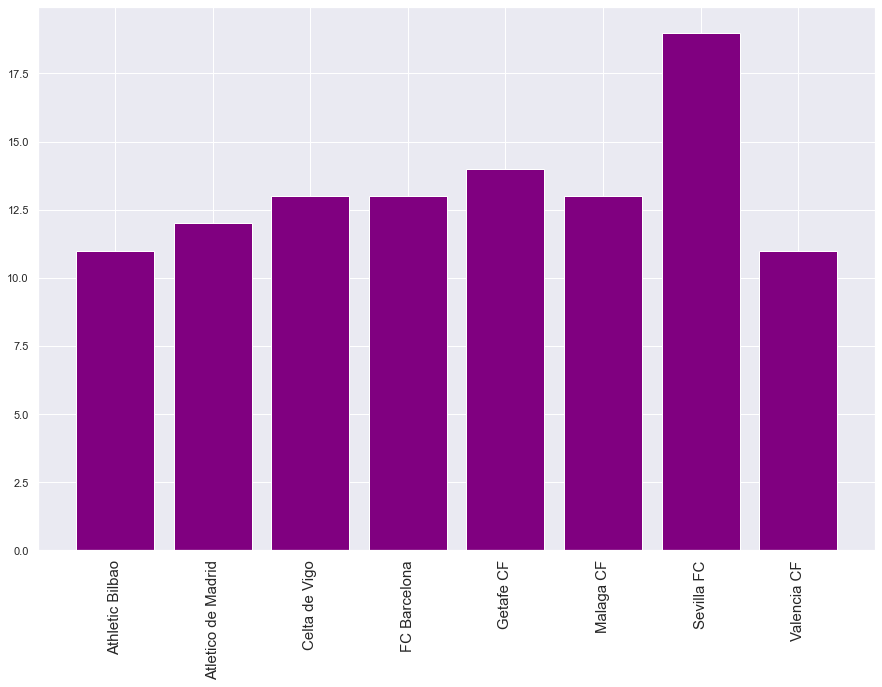

In [34]:
sns.set(rc={'figure.figsize':(15,10)})
df_opponent = df.groupby("Opponent").size().reset_index(name="Count")
df_favorite_opponent = df_opponent[df_opponent["Count"]>10]
plt.xticks(rotation=90,fontsize=15)
plt.bar(x=df_favorite_opponent["Opponent"],height=df_favorite_opponent["Count"],color="purple")


# 5.9 Assisted By

In [35]:
mins = list(map(str,df.Goal_assist.value_counts().sort_values(ascending=False).index))
for min in df["Goal_assist"]:
    if min not in mins:
        mins.append(min)
mins1 = mins[:int(len(mins)/5)]
mins2 = mins[int(len(mins)/5):int(2*len(mins)/5)]
mins3 = mins[2*int(len(mins)/5):int(3*len(mins)/5)]
mins4 = mins[3*int(len(mins)/5):int(4*len(mins)/5)]
mins5 = mins[4*int(len(mins)/5):]

Text(0.5, 1.0, 'Goals  Assisted by ')

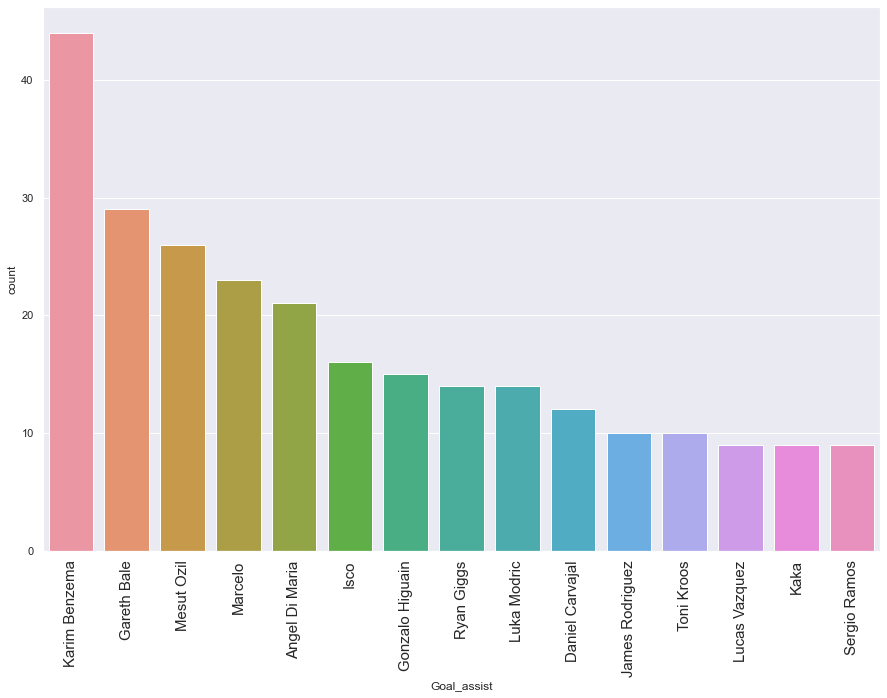

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=90,fontsize=15)
sns.countplot(df["Goal_assist"],order=mins1)
p.axes.set_title("Goals  Assisted by ",fontsize=30)

Text(0.5, 1.0, 'Goals  Assisted by ')

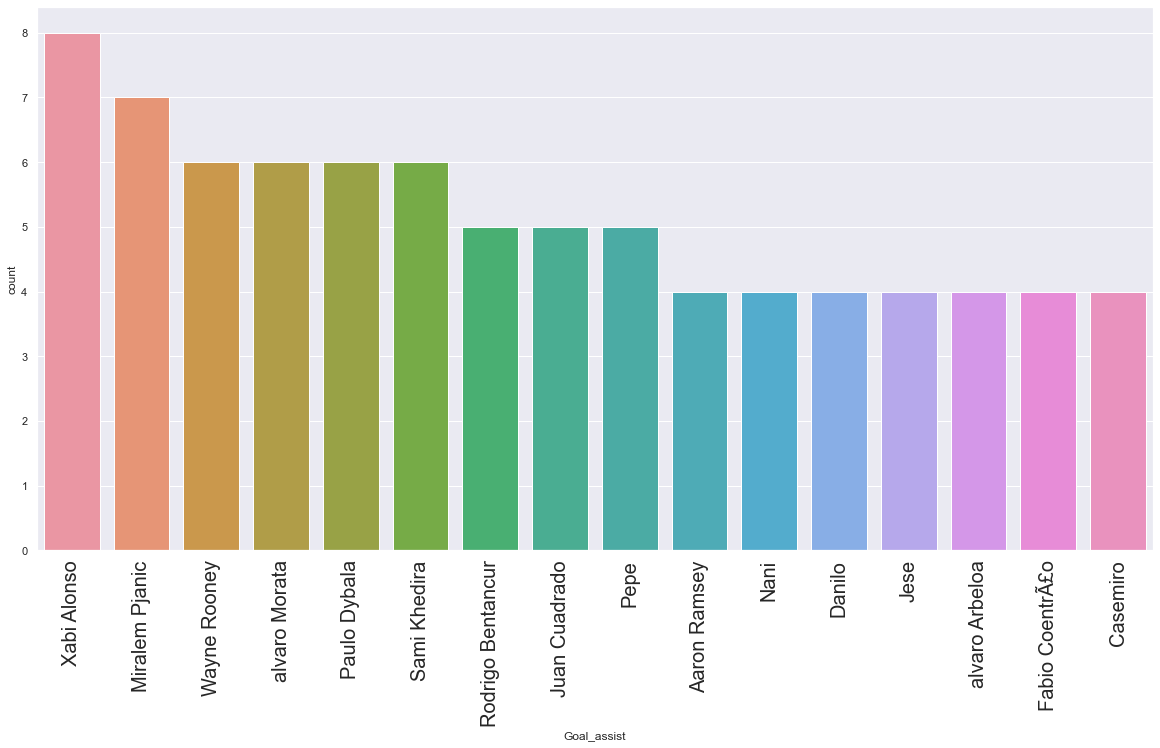

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90,fontsize=20)
sns.countplot(df["Goal_assist"],order=mins2)
p.axes.set_title("Goals  Assisted by ",fontsize=30)

Text(0.5, 1.0, 'Goals  Assisted by ')

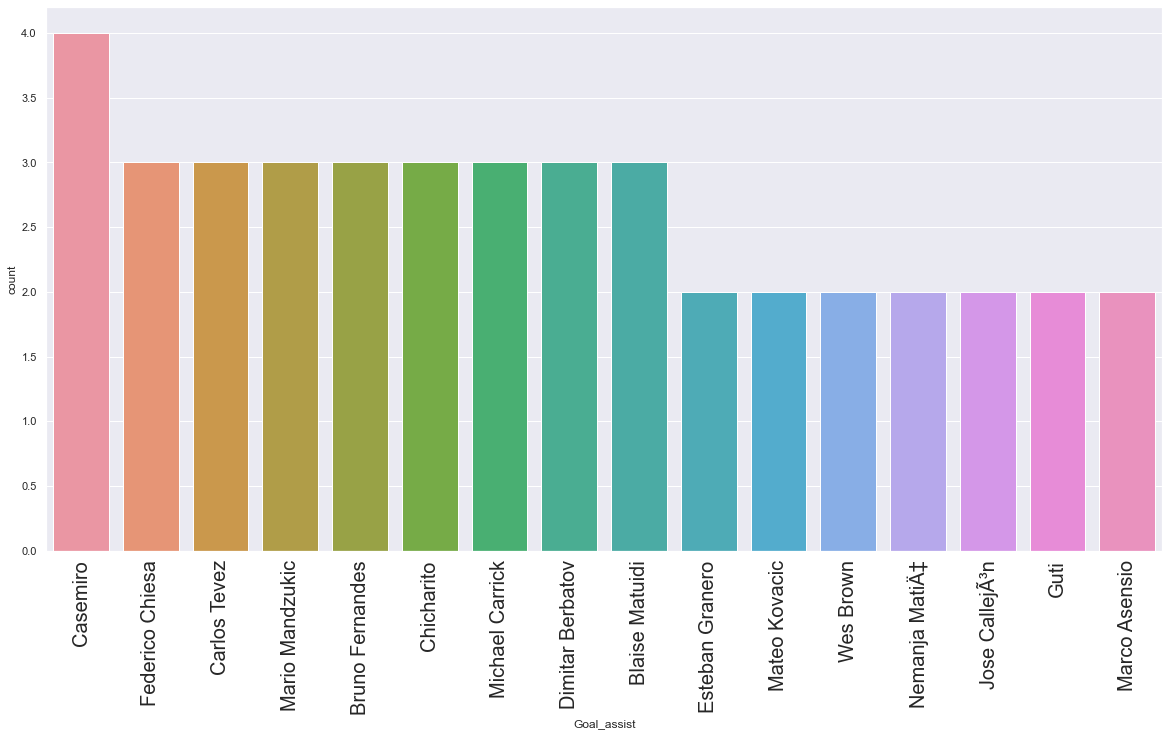

In [38]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90,fontsize=20)
sns.countplot(df["Goal_assist"],order=mins3)
p.axes.set_title("Goals  Assisted by ",fontsize=30)

Text(0.5, 1.0, 'Goals  Assisted by ')

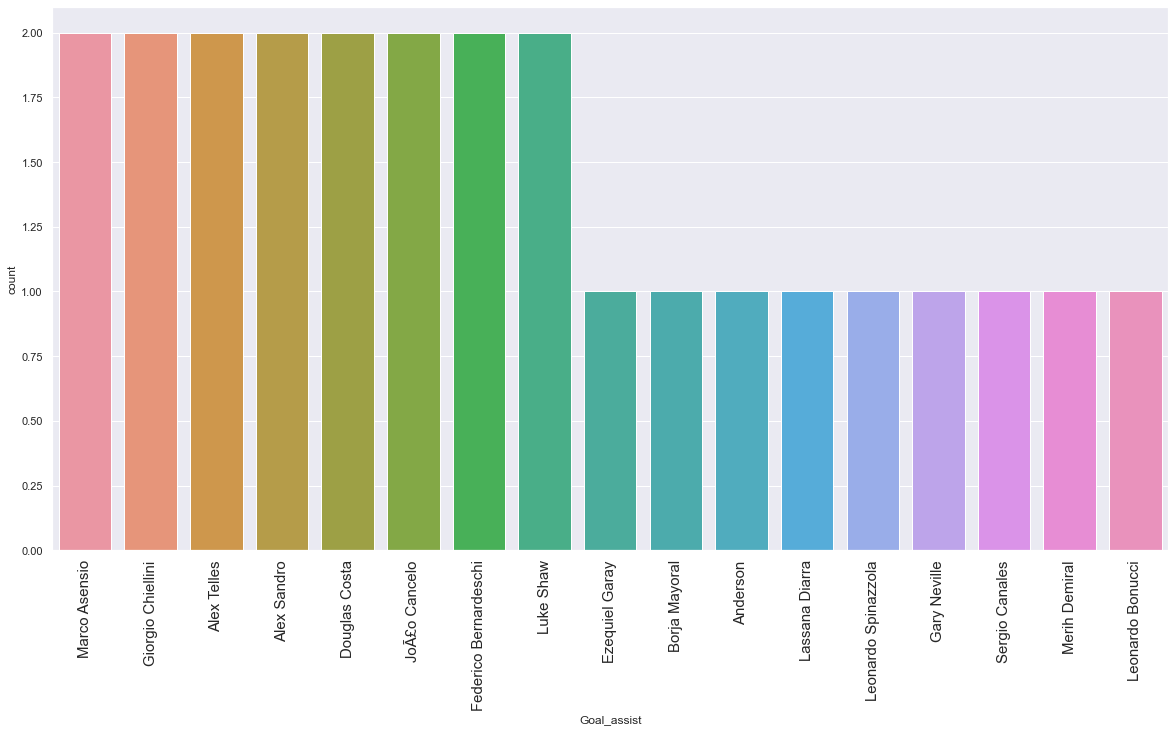

In [39]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90,fontsize=15)
sns.countplot(df["Goal_assist"],order=mins4)
p.axes.set_title("Goals  Assisted by ",fontsize=30)

Text(0.5, 1.0, 'Goals  Assisted by ')

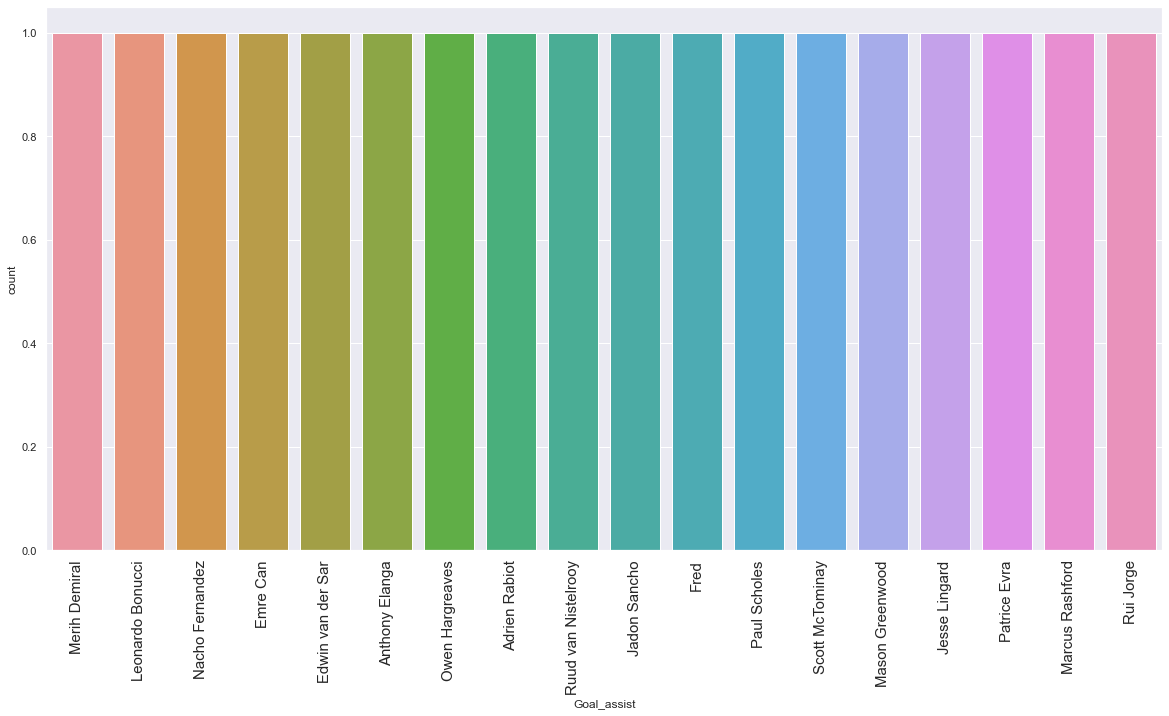

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90,fontsize=15)
sns.countplot(df["Goal_assist"],order=mins5)
p.axes.set_title("Goals  Assisted by ",fontsize=30)

# Goals Per Venue

# 5.10 Goals Home- Outside Home #

Text(0.5, 1.0, 'Goals Per Venue')

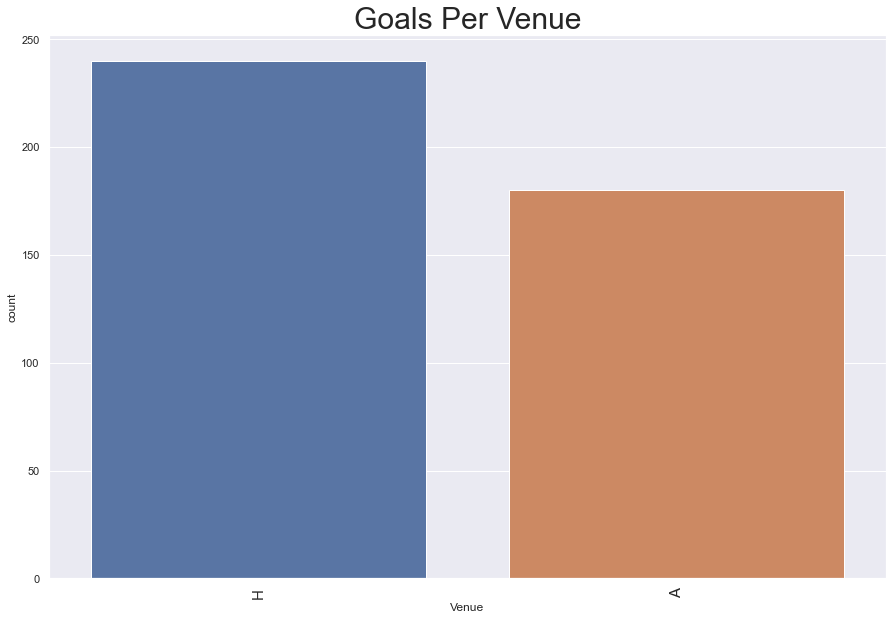

In [41]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=15)
p=sns.countplot(df["Venue"],order=df.Venue.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals Per Venue",fontsize=30)


<AxesSubplot:title={'center':'Goals Per Venue'}, ylabel='Venue'>

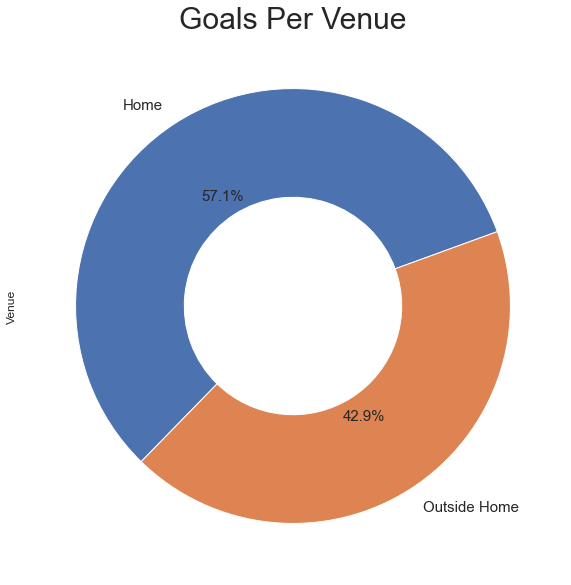

In [42]:
plt.figure(figsize=(15,10))
plt.title("Goals Per Venue",fontsize=30)
df.Venue.value_counts().plot(kind="pie",labels=["Home","Outside Home"],wedgeprops=
                       dict(width=0.5),autopct="%1.1f%%",
                       startangle=20,textprops={'fontsize': 15})